<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/Nadav/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started with data cleaning

In [1]:
from google.colab import drive
drive.flush_and_unmount()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final_Progect_PapaJohns/All_years.csv')

<ipython-input-3-77098e6204a6>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final_Progect_PapaJohns/All_years.csv')


In [4]:
df

,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original
0,2022-01-01,1,0.0,NaN,67,NaN,14328.0,1,4.95,0.0,4.95,1
1,2022-01-01,1,0.0,NaN,67,NaN,14354.0,2,9.90,0.0,9.90,1
2,2022-01-01,1,1.0,פיצות מיוחדות 14',4,ביאנקה 14' [],14321.0,1,85.90,0.0,85.90,1
3,2022-01-01,1,1.0,פיצות מיוחדות 14',7,טוסקנית 14' [],14304.0,1,85.90,0.0,85.90,1
4,2022-01-01,1,1.0,פיצות מיוחדות 14',13,המומלצת 14' [],14358.0,1,89.90,0.0,89.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...
258189,2024-12-31,12,52,מנות נלוות,3117,שובר 50 שח DV,7669633.0,5,125.00,0.0,125.00,1
258190,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.00,0.0,0.00,1
258191,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.90,0.0,19.90,1
258192,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.90,0.0,19.90,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258194 entries, 0 to 258193
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         255734 non-null  object 
 1   Month        258194 non-null  int64  
 2   סוג פריט     256298 non-null  object 
 3   תאור סוג     239152 non-null  object 
 4   מס' פריט     258194 non-null  object 
 5   תאור פריט    257188 non-null  object 
 6   הזמנה        256298 non-null  float64
 7   כמות         258194 non-null  int64  
 8   סכום         256978 non-null  float64
 9   הנחה לפריט   258194 non-null  float64
 10  אחרי הנחה    257946 non-null  float64
 11  Is_original  258194 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 23.6+ MB


## Deleting missing values

In [6]:
df.dropna(inplace=True)

## Convert Date to date format

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
weekday_map = {
    0: 'שני',
    1: 'שלישי',
    2: 'רביעי',
    3: 'חמישי',
    4: 'שישי',
    5: 'שבת',
    6: 'ראשון'}

In [9]:
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

df['Is_Weekend'] = df['Weekday'].isin([4, 5]).astype(int)
df['Day_Name'] = df['Weekday'].map(weekday_map)

In [10]:
df.tail(3)

,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original,Year,Day,Weekday,Is_Weekend,Day_Name
258191,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9,0.0,19.9,1,2024,31,1,0,שלישי
258192,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9,0.0,19.9,1,2024,31,1,0,שלישי
258193,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669633.0,3,384.0,0.0,384.0,1,2024,31,1,0,שלישי


In [11]:
columns_order = [
    'Date',
    'Year',
    'Month',
    'Day',
    'Day_Name',
    'Is_Weekend',
    'תאור פריט',
    'הזמנה',
    'כמות',
    'סכום',]

df_all_years = df[columns_order].copy()

In [12]:
df_all_years.tail(3)

,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,הזמנה,כמות,סכום
258191,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9
258192,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9
258193,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669633.0,3,384.0


## Daily summary of orders

In [13]:
daily_summary = df_all_years.groupby('Date').agg({
    'כמות': 'sum',
    'סכום': 'sum',
    'הזמנה': pd.Series.nunique,
    'Is_Weekend': 'first',
}).reset_index()

# שינוי שמות עמודות לנוחות
daily_summary.rename(columns={
    'כמות': 'Total_Quantity',
    'סכום': 'Total_Amount',
    'הזמנה': 'Unique_Orders'}, inplace=True)

daily_summary.sample(3)

,Date,Total_Quantity,Total_Amount,Unique_Orders,Is_Weekend
7,2022-01-08,549,10196.88,100,1
330,2024-02-01,325,6147.15,72,0
397,2024-04-13,302,5728.75,57,1


## Consolidate orders by "הזמנה"

In [14]:
df_all_years = df_all_years.groupby('הזמנה').agg({
    'Date': 'first',
    'Year': 'first',
    'Month': 'first',
    'Day': 'first',
    'Day_Name': 'first',
    'Is_Weekend': 'first',
    'תאור פריט': lambda x: ', '.join(x.unique()),  # מצרף שמות ייחודיים
    'כמות': 'sum',
    'סכום': 'sum',}).reset_index()

## Function to clean up descriptions

In [15]:
import re

def clean_description(text):
    if pd.isnull(text):
        return text
    text = re.sub(r'\[\s*\]', '', text)  # מסיר [] ריקים
    text = re.sub(r'\s+', ' ', text)     # מסיר רווחים כפולים
    text = text.strip(' ,')              # מסיר רווחים ופסיקים מיותרים בהתחלה/סוף
    return text

df_all_years['תאור פריט'] = df_all_years['תאור פריט'].apply(clean_description)

In [16]:
# הוספת עמודה חדשה שמכילה את מספר הפריטים הייחודיים בכל הזמנה
df_all_years['מספר פריטים'] = df_all_years['תאור פריט'].apply(
    lambda x: len(set(x.split(', '))) if pd.notnull(x) else 0)

In [17]:
# מילות מפתח לכל קטגוריה
pizza_keywords = [
    'פיצה אישית', 'פאפא קראסט קלאסי 14\'', 'קלאסית 14\'', 'קלאסית דקה 14\'',
    'קלאסית 16\'', 'קלאסית 8\'', '2 פיצות משפחתיות', 'מבצע פיצה קלאסית',
    'היוונית 14\'']

topping_keywords = [
    'זיתים ירוקים', 'פטריות', 'תירס', 'בצל סגול', 'זיתי קלמטה', 'בולגרית',
    'עגבניות', 'בצל לבן', 'אננס', 'חלפיניו', 'טונה', 'ארטישוק', 'תוספת גבינה']

drink_keywords = [
    'קולה זירו', 'קוקה קולה', 'פחית קולה', 'פיוז טי אפרסק']

other_keywords = [
    'רוטב', 'רטבים', 'אצבעות גבינה', 'פפיוני שום פרמזן', 'שוקולד קראנץ',
    'צ\'יזי רול', 'גרליק בייטס', 'שקית לקוח', 'הטבה', 'מבצע', 'מארז',
    'משולשי קרטון']

## General function for counting words by category:

In [18]:
def count_matches(text, keywords):
    if pd.isnull(text):
        return 0
    items = text.split(', ')
    return sum(any(k in item for k in keywords) for item in items)

## Adding new columns:

In [19]:
df_all_years['מספר פיצות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, pizza_keywords))
df_all_years['מספר תוספות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, topping_keywords))
df_all_years['מספר שתייה'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, drink_keywords))
df_all_years['מספר פריטים אחרים'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, other_keywords))

## Function to automatically add uncategorized items

In [20]:
def update_keyword_lists_from_unclassified(unclassified_items):
    global pizza_keywords, topping_keywords, drink_keywords, other_keywords

    for item in unclassified_items:
        name = item.lower()
        if any(word in name for word in ['פיצה', 'קלאסית', 'ורסיה']):
            pizza_keywords.append(item)
        elif any(word in name for word in ['זית', 'בצל', 'תירס', 'פטריות', 'תוספת', 'גבינה', 'טונה', 'אננס', 'עגבניה', 'ארטישוק']):
            topping_keywords.append(item)
        elif any(word in name for word in ['קולה', 'ספרייט', 'פיוז', 'פחית', 'שתייה']):
            drink_keywords.append(item)
        elif any(word in name for word in ['רוטב', 'שקית', 'שובר', 'מבצע', 'הטבה', 'אריזה', 'מארז']):
            other_keywords.append(item)
       #else:
            #print(f"🤔 לא מסווג: {item}")

In [21]:
    # הסרה של כפילויות
    pizza_keywords = list(set(pizza_keywords))
    topping_keywords = list(set(topping_keywords))
    drink_keywords = list(set(drink_keywords))
    other_keywords = list(set(other_keywords))

## Identify unclassified items

In [22]:
from collections import Counter

unique_descriptions = df_all_years['תאור פריט'].dropna().unique()
all_words = []

for desc in unique_descriptions:
    all_words.extend(desc.split(', '))

word_counts = Counter(all_words)

## Identify items that do not belong to any keyword list

In [23]:
unclassified_items = [
    item for item in word_counts
    if not any(k in item for k in pizza_keywords + topping_keywords + drink_keywords + other_keywords)]

In [24]:
def auto_classify_unclassified_items(unclassified_items):
    global pizza_keywords, topping_keywords, drink_keywords, other_keywords
    # מילים שמאפיינות כל קטגוריה
    pizza_terms = ['פיצה', 'קלאסית', 'טוסקנית', 'טוליפ', 'ביאנקה', 'מרגריטה', 'דקה', 'מיקס', 'קריביאן', 'טבעונית', 'סופר', 'אישית', 'משפחתית', 'ללא גלוטן',
                   'פיצות', '14']
    topping_terms = ['זיתים', 'פטריות', 'תוספת', 'גבינה', 'עגבניה', 'עוף', 'אנשובי', 'נקניק', 'פלפל', 'בצל', 'טונה', 'ארטישוק']
    drink_terms = ['קולה', 'ספרייט', 'פיוז', 'מים', 'מונסטר', 'פריגת', 'שתיה', 'פחית', 'פאנטה']
    other_terms = ['רוטב', 'קינוח', 'גלידה', 'שובר', 'שוקולד', 'צ\'יפס', 'אצבעות', 'מדבקה', 'הטבה', 'חטיף', 'ארוחה', 'נלוות', 'מארז', 'כרטיס', 'משולשים']

    # מיון הפריטים לרשימות
    for item in unclassified_items:
        name = item.lower()
        added = False

        if any(term in name for term in pizza_terms):
            pizza_keywords.append(item)
            added = True
        elif any(term in name for term in topping_terms):
            topping_keywords.append(item)
            added = True
        elif any(term in name for term in drink_terms):
            drink_keywords.append(item)
            added = True
        elif any(term in name for term in other_terms):
            other_keywords.append(item)
            added = True

        #if not added:
            #print(f"עדיין לא סווג: {item}")

    # הסרת כפילויות
    pizza_keywords = list(set(pizza_keywords))
    topping_keywords = list(set(topping_keywords))
    drink_keywords = list(set(drink_keywords))
    other_keywords = list(set(other_keywords))

## Call the function to automatically update the lists:

In [25]:
update_keyword_lists_from_unclassified(unclassified_items)

In [26]:
df_all_years['מספר פיצות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, pizza_keywords))
df_all_years['מספר תוספות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, topping_keywords))
df_all_years['מספר שתייה'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, drink_keywords))
df_all_years['מספר פריטים אחרים'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, other_keywords))

In [27]:
df_all_years['סה"כ מסווגים'] = df_all_years[['מספר פיצות', 'מספר תוספות', 'מספר שתייה', 'מספר פריטים אחרים']].sum(axis=1)
df_all_years['פער במספור'] = df_all_years['מספר פריטים'] - df_all_years['סה"כ מסווגים']

In [28]:
df_all_years['פער במספור'].value_counts().sort_index()

,count
פער במספור,
-2,1
-1,4414
0,32186
1,15767
2,4902
3,1596
4,577
5,195
6,51


In [29]:
df_all_years.sample(3)

,הזמנה,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,כמות,סכום,מספר פריטים,מספר פיצות,מספר תוספות,מספר שתייה,מספר פריטים אחרים,"סה""כ מסווגים",פער במספור
46414,7655952.0,2024-07-08,2024,7,8,שני,0,קלאסית 16',1,85.80,1,1,0,0,0,1,0
36117,7645288.0,2024-09-04,2024,9,4,רביעי,0,"כדורי פירה 12 יח', שוקולד קראנץ' רול, פיוז טי ...",11,189.55,10,1,2,3,3,9,1
29396,7638364.0,2024-01-24,2024,1,24,רביעי,0,"בצל סגול, אננס, קלאסית 14' , 2 פיצות משפחתיות",7,135.80,4,2,2,0,0,4,0


## Outliers

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# פונקציה למציאת ערכים חריגים בשיטת IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

In [31]:
# Quantity
outliers_qty, lower_qty, upper_qty = detect_outliers_iqr(df_all_years['כמות'])
print(f'⚠️ Outliers in "Quantity" column: {len(outliers_qty)} rows')
print(f'   Outlier thresholds: Quantity < {lower_qty:.2f} or Quantity > {upper_qty:.2f}\n')

⚠️ Outliers in "Quantity" column: 1141 rows
   Outlier thresholds: Quantity < -5.50 or Quantity > 14.50



In [32]:
# Amount
outliers_sum, lower_sum, upper_sum = detect_outliers_iqr(df_all_years['סכום'].dropna())
print(f'⚠️ Outliers in "Amount" column: {len(outliers_sum)} rows')
print(f'   Outlier thresholds: Amount < {lower_sum:.2f} or Amount > {upper_sum:.2f}')

⚠️ Outliers in "Amount" column: 1438 rows
   Outlier thresholds: Amount < -95.78 or Amount > 257.23


In [33]:
df_all_years['סכום'].value_counts().sort_index()

,count
סכום,
-83.85,1
-32.80,1
-9.50,4
0.00,3270
0.50,88
...,...
2696.00,1
2794.00,1
2932.90,1


## Boxplot

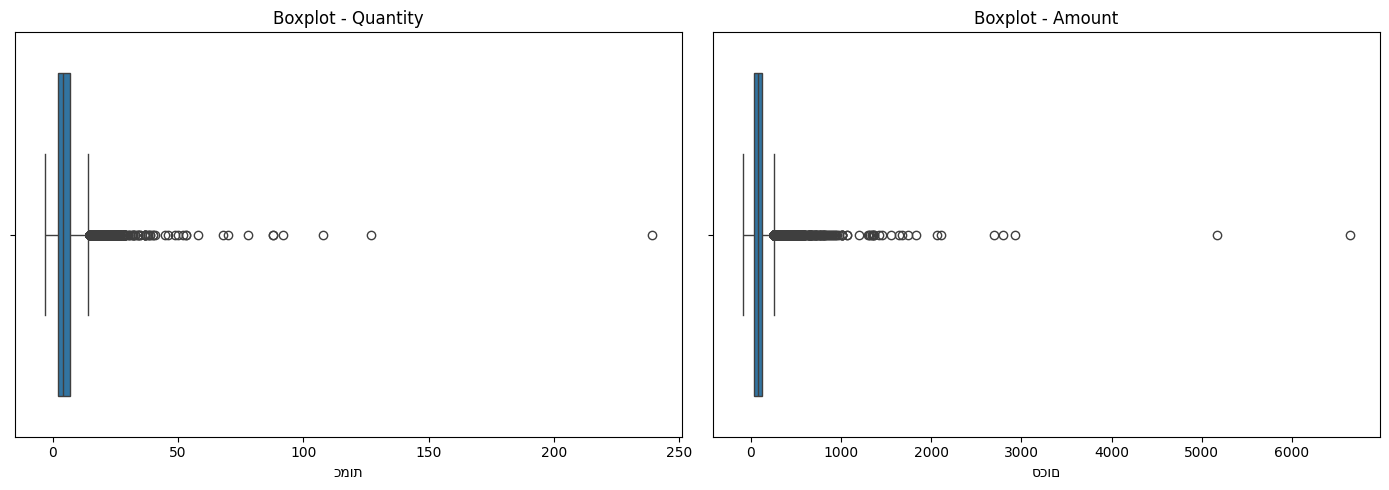

In [34]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_all_years['כמות'])
plt.title('Boxplot - Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_all_years['סכום'])
plt.title('Boxplot - Amount')

plt.tight_layout()
plt.show()